<a href="https://colab.research.google.com/github/Martishamao/Spanish-Red-Wine-Analysis/blob/main/Project_2_(Report_Notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2

#Spanish Wine Quality Dataset
- Martisha Owens
- 10/20/2022
- https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset
- This data describes 7500 different Spanish red wines.
- The features include name of the wine, winery, year, rating, number of reviews, country, region, price, type of wine variety, body, and acidity.
- The target is the rating of the Spanish wine.
- This is a Classification problem, which will predict the rating on a scale from 0 to 5 (Or for this data 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, and 4.9).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Clean the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/wines_SPA.csv'
df = pd.read_csv(filename)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [215]:
dfc = df.copy()

In [216]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


##Delete unnecessary columns.


In [217]:
dfc['country'].value_counts()

Espana    7500
Name: country, dtype: int64

> Since the data is strictly for red wine in Spain, this column is unnecessary.

>The number of reviews is also not a defining feature of the actual wine itself and will be dropped.

>I will be dropping Winery because this may cause overfitting.

In [218]:
dfc.drop(columns = {'country','num_reviews','winery'},inplace = True)

In [219]:
dfc.head()

,wine,year,rating,region,price,type,body,acidity
0,Tinto,2013,4.9,Toro,995.00,Toro Red,5.0,3.0
1,Vina El Pison,2018,4.9,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Unico,2009,4.8,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Unico,1999,4.8,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Unico,1996,4.8,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


##Deleted duplicate rows.

In [220]:
dfc.duplicated().sum()

5453

In [221]:
dfc.drop_duplicates(inplace = True)
dfc.duplicated().sum()

0

In [222]:
dfc.shape

(2047, 8)

> Even after removing the duplicated data there are still 2047 instances of data and 8 columns of features.

##Identified and addressed missing values.


In [223]:
dfc.isna().sum()

wine         0
year         2
rating       0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64

> Columns year, type, body, and acidity has missing values.

In [224]:
print(f'Body and Acidity are missing {round((271/2048*100),2)}% of their data.')

Body and Acidity are missing 13.23% of their data.


###Check if  year can be manually updated.

In [225]:
dfc.loc[dfc['year'].isna()]

,wine,year,rating,region,price,type,body,acidity
46,Unico Reserva Especial Edicion,NaN,4.7,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,Fourth Edition,NaN,4.4,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [226]:
dfc_Vega = dfc[(dfc['region']=='Ribera del Duero')&(dfc['wine']=='Unico Reserva Especial Edicion')]
dfc_Vega.sort_values(by = 'year')
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

,wine,year,rating,region,price,type,body,acidity
314,Unico Reserva Especial Edicion,1982,4.6,Ribera del Duero,1238.43,Ribera Del Duero Red,5.0,3.0
31,Unico Reserva Especial Edicion,1985,4.8,Ribera del Duero,1182.77,Ribera Del Duero Red,5.0,3.0
130,Unico Reserva Especial Edicion,1986,4.7,Ribera del Duero,1113.20,Ribera Del Duero Red,5.0,3.0
118,Unico Reserva Especial Edicion,1987,4.7,Ribera del Duero,1071.45,Ribera Del Duero Red,5.0,3.0
226,Unico Reserva Especial Edicion,1989,4.6,Ribera del Duero,895.40,Ribera Del Duero Red,5.0,3.0
97,Unico Reserva Especial Edicion,1995,4.7,Ribera del Duero,1500.00,Ribera Del Duero Red,5.0,3.0
72,Unico Reserva Especial Edicion,1996,4.7,Ribera del Duero,290.00,Ribera Del Duero Red,5.0,3.0
63,Unico Reserva Especial Edicion,2000,4.7,Ribera del Duero,877.85,Ribera Del Duero Red,5.0,3.0
19,Unico Reserva Especial Edicion,2004,4.8,Ribera del Duero,824.43,Ribera Del Duero Red,5.0,3.0
28,Unico Reserva Especial Edicion,2005,4.8,Ribera del Duero,813.96,Ribera Del Duero Red,5.0,3.0


In [227]:
dfc_Unica = dfc[(dfc['wine']=='Fourth Edition')]
dfc_Unica.head()

,wine,year,rating,region,price,type,body,acidity
851,Fourth Edition,NaN,4.4,Vino de Espana,40.0,Tempranillo,4.0,2.0


> For the two datas missing year, there doesn't seem to be a hint towards what the year should be.

###Check what values are used for Body and Acidity.

In [228]:
dfc[dfc['body'].isna()== True].isna().sum()

wine         0
year         0
rating       0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64

> It appears for all the wine missing bold data, it is also missing acidity.

In [229]:
print(dfc['body'].unique())
print(dfc['acidity'].unique())

[ 5.  4.  3. nan  2.]
[ 3.  2.  1. nan]


> For the missing numerical values year, body, and acidity, we will use the imputer strategy 'median' to get a whole number. From the unique values listed above, body and acidity are whole numbers.

> For wine type, the imputer strategy 'most frequent' will be used.

##Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [230]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 6100
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wine     2047 non-null   object 
 1   year     2045 non-null   object 
 2   rating   2047 non-null   float64
 3   region   2047 non-null   object 
 4   price    2047 non-null   float64
 5   type     1941 non-null   object 
 6   body     1776 non-null   float64
 7   acidity  1776 non-null   float64
dtypes: float64(4), object(4)
memory usage: 143.9+ KB


> Year should be a float but something is causing it to be an object column.

In [231]:
#dfc['year'] = dfc['year'].astype(float)

> There were actually more than 2 wines that had missing year values. I will replace the N.V. (No value) with an actual NaN input.

In [232]:
dfc['year'].replace('N.V.',np.nan, inplace = True)
dfc['year'] = dfc['year'].astype(float)
#https://sparkbyexamples.com/pandas/pandas-replace-nan-with-blank-empty-string/

In [233]:
dfc.isna().sum()

wine         0
year        72
rating       0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64

In [234]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 6100
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wine     2047 non-null   object 
 1   year     1975 non-null   float64
 2   rating   2047 non-null   float64
 3   region   2047 non-null   object 
 4   price    2047 non-null   float64
 5   type     1941 non-null   object 
 6   body     1776 non-null   float64
 7   acidity  1776 non-null   float64
dtypes: float64(5), object(3)
memory usage: 143.9+ KB


In [235]:
pd.set_option('display.max_rows', None)

dtypes = dfc.dtypes
dfc_obj = dtypes[dtypes=='object'].index
for i in dfc_obj:
  print(i)
  dfs = dfc[i]
  dfs.drop_duplicates(inplace = True)
  dfs = dfs.sort_values()
  print(dfs.to_string(index = False))
  print('\n')
  print('---'*20)
#https://stackoverflow.com/questions/68291502/expand-value-counts-view
#https://stackoverflow.com/questions/24644656/how-to-print-pandas-dataframe-without-index

wine
                                              1194
                                                17
                                  1730 Amontillado
                                1730 Pedro Ximenez
                   1902 Centenary Carignan Priorat
                           1903 Centenary Grenache
                                200 Cestos Godello
       200 Monges Edicion Exclusiva Blanco Reserva
                     200 Monges Rioja Gran Reserva
                          200 Monges Rioja Reserva
       200 Monges Rioja Reserva Seleccion Especial
200 Monges Rioja Seleccion Especial Reserva Blanco
                               27 Ribera del Duero
                                               3.9
30 Years V.O.R.S Very Old Palo Cortado Blend Me...
                30 Years VORS Pedro Ximenez Sherry
                    3er Ano Ribera del Duero Tinto
                      4 Varietales Coleccion Rioja
                       40 Aniversario Gran Reserva
                        5 

> There are no updates needed.

#Produced univariate visuals for the target and all features.

In [236]:
dfc.nunique()

wine        847
year         70
rating        8
region       76
price      1292
type         21
body          4
acidity       3
dtype: int64

> Limiting Wine and Region to the top 20 counts because there are too many unique values to graph.

##Histogram

In [237]:
#Setting up the filters for the top 20 items per column
dfw = dfc['wine']
dfw20 = dfw.value_counts().head(20)
Winetop20 = dfc.loc[df['wine'].isin(dfw20.index)]

dfr = dfc['region']
dfr20 = dfr.value_counts().head(20)
Regiontop20 = dfc.loc[df['region'].isin(dfr20.index)]

#https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values

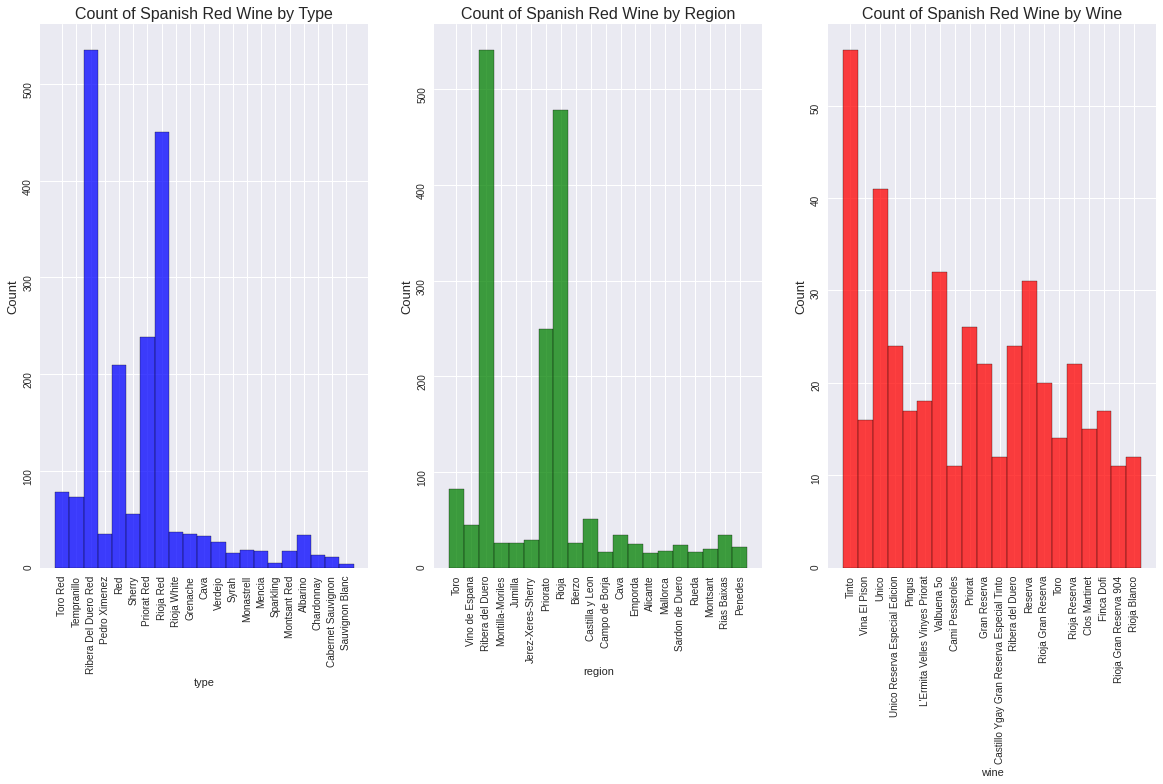

In [238]:
#Type, Region, Wine, Winery
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(20,10))
#24,30
sns.histplot(data = dfc, x = 'type',color= 'b', ax = axes[0])
sns.histplot(data = Regiontop20, x = 'region',  color= 'g', ax = axes[1])
sns.histplot(data = Winetop20, x = 'wine', color= 'r', ax = axes[2])

for x in range(0,3):
  axes[x].tick_params(rotation=90) 
  axes[x].set_ylabel('Count',size = 13)

title_list = [(0, 'Count of Spanish Red Wine by Type'),(1,'Count of Spanish Red Wine by Region'),(2, 'Count of Spanish Red Wine by Wine')]
for x, n in title_list:
  axes[x].set_title(n,size = 16)

plt.style.use('seaborn');
#xhttps://stackoverflow.com/questions/51933830/using-multiple-variables-in-a-for-loop-in-python

##Boxplot

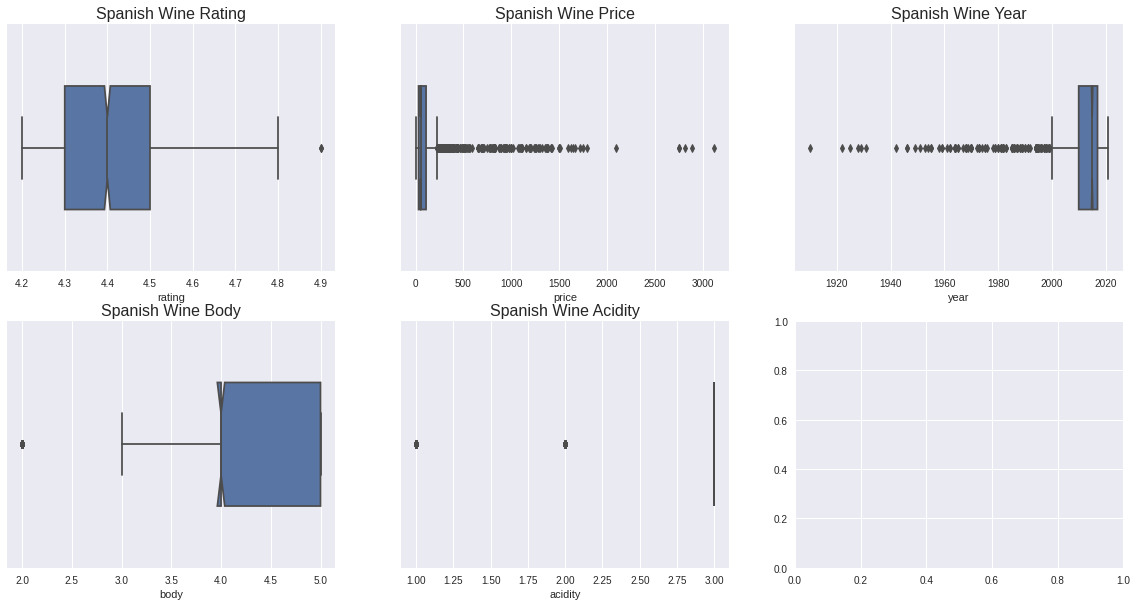

In [239]:
#Year, Rating, Price, Body, Acidity
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

sns.boxplot(data=dfc, x = 'rating', notch = True, width = .5, ax = axes[0,0])
sns.boxplot(data=dfc, x = 'price', notch = True, width = .5, ax = axes[0,1])
sns.boxplot(data=dfc, x = 'year', notch = True, width = .5, ax = axes[0,2])
sns.boxplot(data=dfc, x = 'body', notch = True, width = .5, ax = axes[1,0])
sns.boxplot(data=dfc, x = 'acidity', notch = True, width = .5, ax = axes[1,1])

axes[0,0].set_title('Spanish Wine Rating',size = 16)
axes[0,1].set_title('Spanish Wine Price',size=16)
axes[0,2].set_title('Spanish Wine Year',size=16)
axes[1,0].set_title('Spanish Wine Body',size=16)
axes[1,1].set_title('Spanish Wine Acidity',size=16);

###Identified outliers.



> - The ratings data did not have much of an outlier, with just one at 4.9. 
- Price on the other hand had quite a few outliers on the higher end. The 75th percentile was 110 but there were outliers that ranged all the way up to 3,119.
- Year also had a ton of outliers but on the lower end. The lower whisker was at 2000 but the minimum outlier was 1910.
- The Body of wine had a wide range for the 50th to 75th quartile. In terms of outliers, there was one at 2.
- Lastly, the acidity was concentrated at 3.00. The outlier was anything that wasn't 3, which concluded in two values 1 and 2.

In [240]:
dfc.describe(include='all')

,wine,year,rating,region,price,type,body,acidity
count,2047,1975.000000,2047.000000,2047,2047.000000,1941,1776.000000,1776.000000
unique,847,NaN,NaN,76,NaN,21,NaN,NaN
top,Tinto,NaN,NaN,Ribera del Duero,NaN,Ribera Del Duero Red,NaN,NaN
freq,56,NaN,NaN,541,NaN,535,NaN,NaN
mean,NaN,2011.150886,4.401221,NaN,135.288966,NaN,4.259009,2.921171
std,NaN,11.189739,0.146992,NaN,272.236590,NaN,0.652991,0.334802
min,NaN,1910.000000,4.200000,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,2010.000000,4.300000,NaN,31.911965,NaN,4.000000,3.000000
50%,NaN,2015.000000,4.400000,NaN,53.700000,NaN,4.000000,3.000000
75%,NaN,2017.000000,4.500000,NaN,110.000000,NaN,5.000000,3.000000


#Correlation Observation

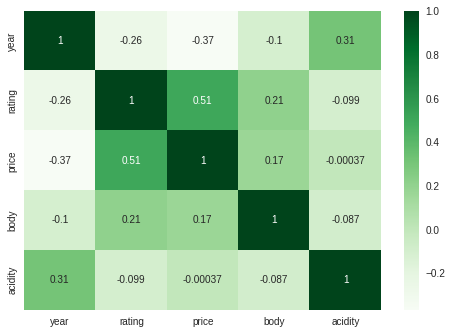

In [241]:
sns.heatmap(dfc.corr(), cmap = 'Greens',annot=True);

> Our target, y, is rating and according to the heatmap above, it has a moderate correlation of 0.51 with price. It has some positive correlation with body at 0.21 and negative correlation with year. There is no correlation with acidity. 

#Multivariate exploratory visuals

##Scatterplot

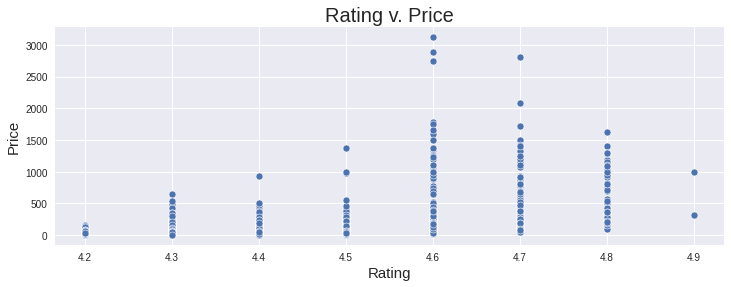

In [242]:
#Price v. Rating
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.scatterplot(data=dfc, x = 'rating',y = 'price')
ax.set_xlabel('Rating',fontsize = 15)
ax.set_ylabel('Price',fontsize = 15)
ax.set_title('Rating v. Price',fontsize = 20);

> Based on the heatmap, Rating and Price had a 0.51 correlation. For the scatterplot, it does seem like the higher rated wine is not entirely the most expensive. However, the more expensive wine is rated better than the average of 4.4.

##Bar Plot

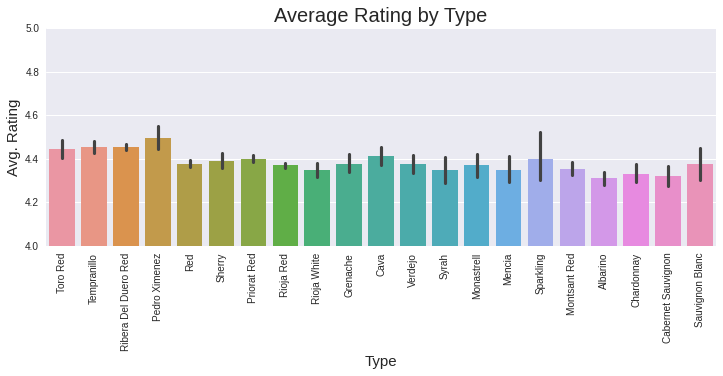

In [243]:
#Type v. Rating
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.barplot(data=dfc, x='type', y = 'rating')

ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Avg. Rating',fontsize = 15)
ax.set_xlabel('Type',fontsize = 15)
ax.set_title('Average Rating by Type',fontsize = 20)
plt.ylim(4,5);

> In terms of Wine types, Pedro Ximenez had an average rating above all other wine types. Coming in behind was Toto Red, Tempranillo, and Ribera Del Duero Red.

#Model Development

##Prepare Model

###Import libraries

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

###Train the data

In [245]:
y = dfc['rating']
X = dfc.drop(columns = 'rating')

In [246]:
y.replace({4.2:2,4.3:3,4.4:4,4.5:5,4.6:6,4.7:7,4.8:8,4.9:9}, inplace = True)
y.unique()

array([9., 8., 7., 6., 5., 4., 3., 2.])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

##Preprocessor

In [248]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

obj_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [249]:
obj_pipe = make_pipeline(freq_imputer, ohe)
num_pipe = make_pipeline(median_imputer, scaler)

obj_tuple = (obj_pipe,obj_selector)
num_tuple = (num_pipe,num_selector)

preprocessor = make_column_transformer(obj_tuple,num_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b51d61050>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b4d592bd0>)])

In [250]:
def evaluate_classification(model): 
                             
    pipeline = make_pipeline(preprocessor,model)
    pipeline.fit(X_train,y_train)

    # Predictions
    y_pred1 = pipeline.predict(X_train)
    y_pred2 = pipeline.predict(X_test)

    # Classification report for the test data
    print('CLASSIFICATION REPORT FOR: TRAIN')
    print(classification_report(y_train, y_pred1))
    print('---'*20)
    print('CLASSIFICATION REPORT FOR: TEST')
    print(classification_report(y_test, y_pred2))
    
    # Confusion Matrix
    print('---'*20)
    print('CONFUSION MATRIX: TEST')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap ='Greens', normalize ='true');

In [251]:
import warnings
warnings.filterwarnings("ignore")

#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

##Logistic Regression

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       0.78      0.66      0.71       175
         3.0       0.65      0.88      0.75       529
         4.0       0.69      0.63      0.66       373
         5.0       0.64      0.42      0.51       197
         6.0       0.55      0.51      0.53       136
         7.0       0.62      0.40      0.49        88
         8.0       0.56      0.26      0.35        35
         9.0       0.00      0.00      0.00         2

    accuracy                           0.66      1535
   macro avg       0.56      0.47      0.50      1535
weighted avg       0.66      0.66      0.65      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.45      0.35      0.39        52
         3.0       0.46      0.71      0.56       177
         4.0       0.34      0.33      0.33       111
      

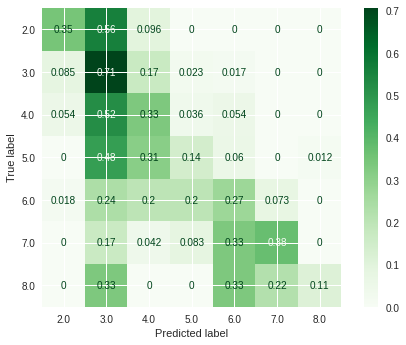

In [252]:
logreg = LogisticRegression()

evaluate_classification(logreg)

###Hypertune

In [253]:
def hyper_classification(model,param): 
                             
    pipeline = make_pipeline(preprocessor,model)
    pipeline.fit(X_train,y_train)

    grid_search = GridSearchCV(pipeline,param)
    grid_search.fit(X_train,y_train)
    grid_search.best_params_

    best_model = grid_search.best_estimator_
    # Predictions
    y_pred1 = best_model.predict(X_train)
    y_pred2 = best_model.predict(X_test)

    print(best_model)
    print('---'*20)

    # Classification report for the train and test data
    print('CLASSIFICATION REPORT FOR: TRAIN')
    print(classification_report(y_train, y_pred1))
    print('---'*20)
    print('CLASSIFICATION REPORT FOR: TEST')
    print(classification_report(y_test, y_pred2))
    
    # Confusion Matrix
    print('---'*20)
    print('CONFUSION MATRIX: TEST')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap ='Greens', normalize ='true')

In [254]:
param_grid = {'logisticregression__penalty':['l1','l2']
              ,'logisticregression__C':[1, 10, 100]
              ,'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear']}

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b53ceee90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                              

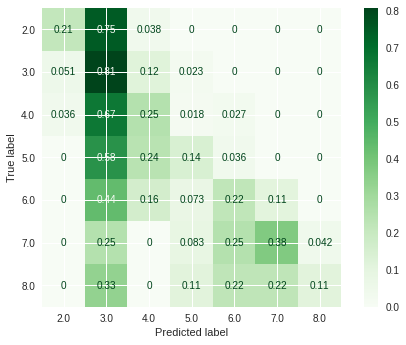

In [255]:
hyper_classification(logreg,param_grid)

##Decision Tree

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       175
         3.0       1.00      1.00      1.00       529
         4.0       1.00      1.00      1.00       373
         5.0       1.00      1.00      1.00       197
         6.0       1.00      1.00      1.00       136
         7.0       1.00      1.00      1.00        88
         8.0       1.00      1.00      1.00        35
         9.0       1.00      1.00      1.00         2

    accuracy                           1.00      1535
   macro avg       1.00      1.00      1.00      1535
weighted avg       1.00      1.00      1.00      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.46      0.44      0.45        52
         3.0       0.48      0.54      0.51       177
         4.0       0.34      0.36      0.35       111
      

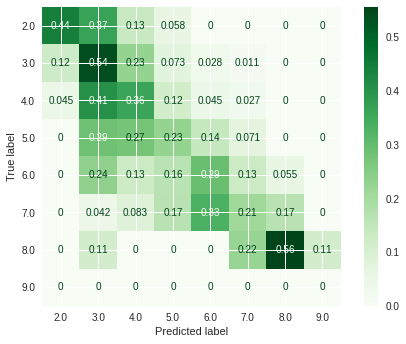

In [256]:
dtc = DecisionTreeClassifier()

evaluate_classification(dtc)

###Hypertune

In [257]:
dtc_grid = {'decisiontreeclassifier__max_depth': [10,20,30],
              'decisiontreeclassifier__min_samples_leaf': [1,3,6],
              'decisiontreeclassifier__min_samples_split': [10,20,100]}

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b53c56cd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                              

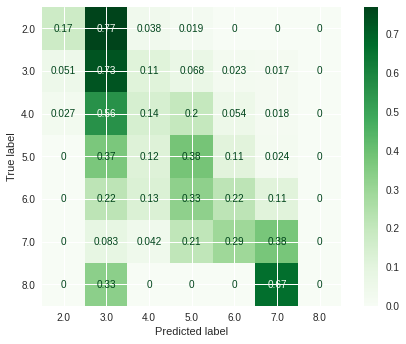

In [258]:
hyper_classification(dtc,dtc_grid)

> The best parameters for Decision Tree were max depth: 10, min samples leaf: 6, and min samples split: 100.

##KNN

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       0.54      0.71      0.62       175
         3.0       0.60      0.74      0.66       529
         4.0       0.53      0.44      0.48       373
         5.0       0.55      0.42      0.47       197
         6.0       0.57      0.50      0.53       136
         7.0       0.62      0.38      0.47        88
         8.0       0.64      0.40      0.49        35
         9.0       0.00      0.00      0.00         2

    accuracy                           0.57      1535
   macro avg       0.51      0.45      0.47      1535
weighted avg       0.57      0.57      0.56      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.31      0.46      0.37        52
         3.0       0.49      0.62      0.55       177
         4.0       0.32      0.26      0.29       111
      

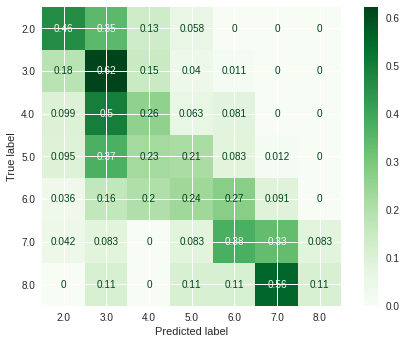

In [259]:
knn = KNeighborsClassifier()

evaluate_classification(knn)

###Hypertune

In [260]:
knn_grid = {'kneighborsclassifier__n_neighbors': [1,2,3]
            ,'kneighborsclassifier__weights': ['uniform','distance']
            ,'kneighborsclassifier__leaf_size': [10,20,30]}

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b53a476d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                              

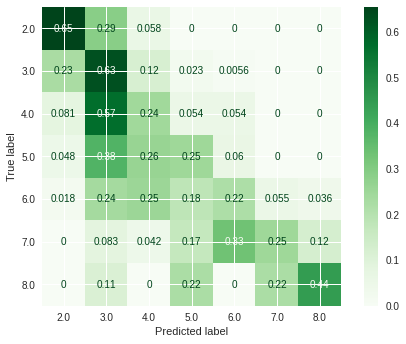

In [261]:
hyper_classification(knn,knn_grid)

> The best parameters for KNN were leaf size:10, n neighbors: 2, and weights:uniform.

##Random Forest

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       175
         3.0       1.00      1.00      1.00       529
         4.0       1.00      1.00      1.00       373
         5.0       1.00      1.00      1.00       197
         6.0       1.00      1.00      1.00       136
         7.0       1.00      1.00      1.00        88
         8.0       1.00      1.00      1.00        35
         9.0       1.00      1.00      1.00         2

    accuracy                           1.00      1535
   macro avg       1.00      1.00      1.00      1535
weighted avg       1.00      1.00      1.00      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.53      0.44      0.48        52
         3.0       0.51      0.68      0.59       177
         4.0       0.38      0.31      0.34       111
      

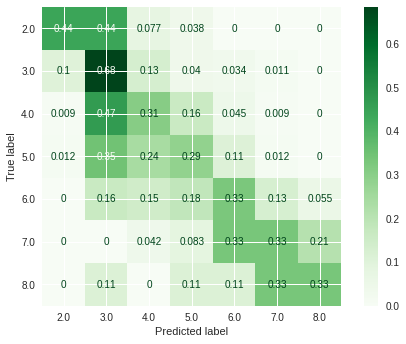

In [262]:
rf = RandomForestClassifier(random_state = 42)

evaluate_classification(rf)

###Hypertune

In [263]:
rf_grid = {'randomforestclassifier__max_depth': [10, 20, 30],
              'randomforestclassifier__min_samples_leaf': [1, 2, 3],
              'randomforestclassifier__min_samples_split': [2, 4, 7]}

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2b55c7d610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                              

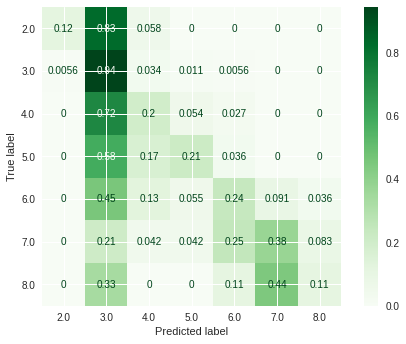

In [264]:
hyper_classification(rf,rf_grid)

> The best parameters for Random Forest were max depth: 30, min_sample_leaf: 1, and min_samples_split: 7.

#Best Selections

> Of the four models and their hypertuned selections used, the best original model was the Random Forest and the best hypertuned selection was KNN.

#PCA

##PCA w/ Random Forest

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       175
         3.0       1.00      1.00      1.00       529
         4.0       1.00      1.00      1.00       373
         5.0       1.00      1.00      1.00       197
         6.0       1.00      0.99      1.00       136
         7.0       1.00      1.00      1.00        88
         8.0       1.00      1.00      1.00        35
         9.0       1.00      1.00      1.00         2

    accuracy                           1.00      1535
   macro avg       1.00      1.00      1.00      1535
weighted avg       1.00      1.00      1.00      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.57      0.40      0.47        52
         3.0       0.48      0.66      0.56       177
         4.0       0.34      0.32      0.33       111
      

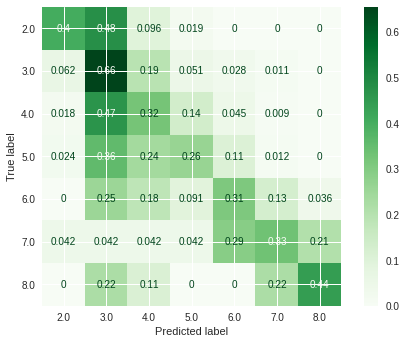

In [265]:
%%time
pca = PCA(n_components=.95)
pca_model = make_pipeline(pca,rf)

evaluate_classification(pca_model)

##PCA w/ Random Forest Hypertune

CLASSIFICATION REPORT FOR: TRAIN
              precision    recall  f1-score   support

         2.0       0.99      0.95      0.97       175
         3.0       0.95      0.99      0.97       529
         4.0       0.97      0.95      0.96       373
         5.0       0.97      0.92      0.95       197
         6.0       0.93      0.96      0.95       136
         7.0       0.96      0.92      0.94        88
         8.0       0.89      0.89      0.89        35
         9.0       0.00      0.00      0.00         2

    accuracy                           0.96      1535
   macro avg       0.83      0.82      0.83      1535
weighted avg       0.96      0.96      0.96      1535

------------------------------------------------------------
CLASSIFICATION REPORT FOR: TEST
              precision    recall  f1-score   support

         2.0       0.50      0.38      0.43        52
         3.0       0.50      0.69      0.58       177
         4.0       0.33      0.34      0.34       111
      

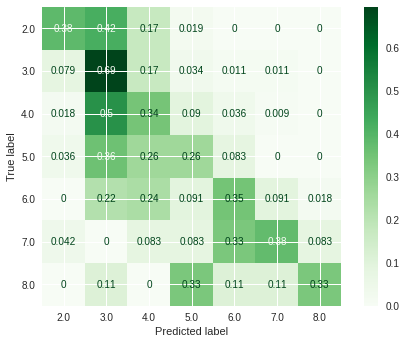

In [267]:
%%time
pca = PCA(n_components=.95)
rf = RandomForestClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=7)
pca_model = make_pipeline(pca,rf)

evaluate_classification(pca_model)

#Production Model
> I have concluded that the best model for predicting the Spanish Red Wine Rating is the PCA model combined with the hypertuned Random Forest Model. I believe it had the best combination of accuracy with the train and test model although the difference is showing high variance. 

>Between the two PCA models, it also performed the quickest at a total of 3.01 seconds.